# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`.

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [4]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York.

In [5]:
temp_NY = temp[temp['State'] == 'New York']
temp_NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average temperature of cities in New York?

In [6]:
temp_NY['Temperature'].mean()

10.74074074074074

#### Which states and cities have a temperature above 15 degrees Celsius?

In [7]:
temp_15 = temp[temp['Temperature'] > 15]
temp_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [8]:
list(temp_15['City'])

['NYC', 'Hartford', 'Treton', 'Newark']

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [9]:
condition = (temp["Temperature"] > 15) & (temp["Temperature"] < 20)

In [10]:
temp.loc[condition,:]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and standard deviation of the temperature of each state.

In [11]:
state_stats = temp.groupby('State')[['State', 'Temperature']].describe()
state_stats

Temperature                                                        \
                  count       mean       std        min        25%        50%   
State                                                                           
Connecticut         2.0  15.833333  1.964186  14.444444  15.138889  15.833333   
New Jersey          2.0  21.111111  1.571348  20.000000  20.555556  21.111111   
New York            3.0  10.740741  8.133404   3.333333   6.388889   9.444444   

                                   
                   75%        max  
State                              
Connecticut  16.527778  17.222222  
New Jersey   21.666667  22.222222  
New York     14.444444  19.444444

# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [12]:
employees = pd.read_csv('Employee.csv')
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the `employees` dataframe. Comment your results.

In [13]:
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### What's the average salary in this company?

In [14]:
salary_mean = employees['Salary'].mean()
salary_mean

48.888888888888886

#### What's the highest salary?

In [15]:
salary_max = employees['Salary'].max()
salary_max

70

#### What's the lowest salary?

In [16]:
salary_max = employees['Salary'].max()
salary_max

70

#### Who are the employees with the lowest salary?

In [17]:
employees[employees['Salary'] == employees['Salary'].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find all the information about an employee called David.

In [18]:
david = employees[employees['Name'] == 'David']
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you return only David's salary?

In [19]:
david['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate.

In [20]:
associate = employees[employees['Title'] == 'associate']
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [21]:
employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
employees[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees whose title is associate and whose salary is above 55.

In [23]:
employees[(employees['Title'] == 'associate') & (employees['Salary'] >55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [24]:
employees.groupby('Years').mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average salary per title?

In [25]:
employees.groupby('Title').mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


####  Find the salary quartiles.


In [26]:
q1 = np.quantile(employees['Salary'], 0.25)
print("the first quartile is", q1)
q2 = np.quantile(employees['Salary'], 0.50)
print("the second quartile is",q2)
q3 = np.quantile(employees['Salary'], 0.75)
print("the third quartile is", q3)

the first quartile is 35.0
the second quartile is 55.0
the third quartile is 60.0


#### Is the mean salary different per gender?

In [27]:
employees.groupby('Gender').mean()

#yes its differente per gender

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [28]:
bydepartment = employees.groupby('Department').describe()
bydepartment

Years                                                Salary         \
           count      mean       std  min   25%  50%   75%  max  count   mean   
Department                                                                      
HR           3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0  45.00   
IT           4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0  48.75   
Sales        2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0  55.00   

                                                      
                  std   min    25%   50%   75%   max  
Department                                            
HR          21.794495  30.0  32.50  35.0  52.5  70.0  
IT          19.311050  30.0  33.75  47.5  62.5  70.0  
Sales        0.000000  55.0  55.00  55.0  55.0  55.0

In [29]:
bydepartment_salary = employees.groupby('Department')['Salary'].describe()
bydepartment_salary

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
HR,3.0,45.00,21.794495,30.0,32.50,35.0,52.5,70.0
IT,4.0,48.75,19.311050,30.0,33.75,47.5,62.5,70.0
Sales,2.0,55.00,0.000000,55.0,55.00,55.0,55.0,55.0


#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [30]:
bydepartment_salary['range'] = bydepartment_salary['max'] - bydepartment_salary['min']

In [31]:
bydepartment_salary['range'] 

Department
HR       40.0
IT       40.0
Sales     0.0
Name: range, dtype: float64

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [32]:
orders = pd.read_csv('Orders.zip')
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [33]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [34]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [35]:
"""
year, month, date could be date object

"""

'\nyear, month, date could be date object\n\n'

####  What is the average purchase price?

In [36]:
orders['UnitPrice'].mean()

3.116174480549152

#### What are the highest and lowest purchase prices? 

In [37]:
print('highest is', orders['UnitPrice'].max())
print('lowest is', orders['UnitPrice'].min())

highest is 8142.75
lowest is 0.0


#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [38]:
spain = orders[orders['Country'] == 'Spain']
customers_spain = set(spain['CustomerID'])
print(customers_spain)

{12544, 12545, 12417, 12547, 12548, 12421, 12550, 12551, 12546, 12556, 12557, 12442, 12445, 12448, 12450, 12454, 12455, 12462, 12596, 12597, 12354, 12484, 17097, 12502, 12507, 12510, 12538, 12539, 12540, 12541}


#### How many customers do we have in Spain?

In [39]:
len(customers_spain)

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [40]:
orders_over50 = orders.groupby('CustomerID').sum().reset_index()
orders_over50 = orders_over50[orders_over50['Quantity'] >50]
print(list(orders_over50['CustomerID']))
print(len(list(orders_over50['CustomerID'])))

[12346, 12347, 12348, 12349, 12350, 12352, 12354, 12355, 12356, 12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12367, 12370, 12371, 12372, 12373, 12374, 12375, 12377, 12378, 12379, 12380, 12381, 12383, 12384, 12386, 12388, 12390, 12391, 12393, 12394, 12395, 12397, 12398, 12399, 12402, 12403, 12405, 12406, 12407, 12408, 12409, 12410, 12412, 12413, 12414, 12415, 12417, 12418, 12420, 12421, 12422, 12423, 12424, 12425, 12426, 12427, 12428, 12429, 12430, 12431, 12432, 12433, 12434, 12435, 12436, 12437, 12438, 12441, 12442, 12444, 12445, 12446, 12447, 12448, 12449, 12450, 12451, 12452, 12453, 12454, 12455, 12456, 12457, 12458, 12461, 12462, 12463, 12464, 12465, 12468, 12471, 12472, 12473, 12474, 12475, 12476, 12477, 12478, 12479, 12480, 12481, 12483, 12484, 12488, 12489, 12490, 12491, 12492, 12493, 12494, 12497, 12498, 12500, 12501, 12502, 12504, 12507, 12508, 12509, 12510, 12512, 12513, 12514, 12515, 12516, 12517, 12518, 12519, 12520, 12521, 12522, 12523, 12524, 12526, 12527

In [41]:
orders_over50

,CustomerID,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent
0,12346,61619,541431,2011,1,2,10,74215,1.04,77183.60
1,12347,42441700,101296926,365971,1383,441,2219,2458,481.21,4310.00
2,12348,2807120,16869685,62324,257,111,472,2341,178.71,1797.24
3,12349,35444274,42165457,146803,803,73,657,631,605.10,1757.55
4,12350,1365627,9231629,34187,34,51,272,197,65.30,334.40
...,...,...,...,...,...,...,...,...,...,...
4333,18278,3262446,5116428,18099,81,18,99,66,29.55,173.90
4335,18281,1560699,3895248,14077,42,49,70,54,39.36,80.82
4336,18282,4642134,6838540,24132,116,60,146,103,62.39,178.05
4337,18283,233950830,425704048,1520316,5503,2489,10346,1397,1220.93,2094.88


#### Select orders from Spain that include more than 50 items.

In [42]:
spain_50 = orders_over50.join(orders['Country'], on='CustomerID')
spain_50= spain_50.loc[spain_50['Country'] == 'Spain']
spain_50

,CustomerID,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,amount_spent,Country
1200,13974,11530470,16022468,56308,280,140,392,249,61.51,413.59,Spain
1201,13975,95708527,189610470,679718,2450,833,4263,1732,742.05,2526.28,Spain
1202,13976,1923705,5534080,20110,50,20,90,154,35.68,357.98,Spain
1203,13978,6357952,8596825,30165,151,33,221,315,18.16,196.79,Spain
1204,13979,19596897,30700512,108594,486,108,702,639,98.94,869.87,Spain
1205,13980,4270629,6274631,22121,110,11,143,172,43.06,200.14,Spain
1206,13982,23711126,61599761,223198,811,222,1599,1136,247.76,1871.81,Spain
1207,13983,18419333,58999737,215162,622,242,1430,1183,677.31,2603.43,Spain
1208,13984,2921473,8832892,32171,128,62,214,679,33.74,920.51,Spain
1209,13985,123378017,199024625,705861,3036,1263,4063,3447,832.19,7060.13,Spain


#### Select all free orders.

In [43]:
#from the entire dataset i imagine

orders[orders['UnitPrice'] == 0]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [44]:
lunch_bag = orders[(orders['Description'].apply(lambda x : x.startswith('lunch bag')))]
lunch_bag

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all `lunch bag` orders made in 2011.

In [45]:
lunch_bag[lunch_bag['year'] == 2011]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

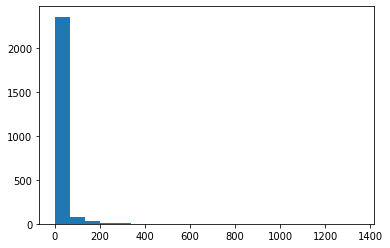

In [46]:
plt.hist(spain['amount_spent'], bins=20)
plt.show()

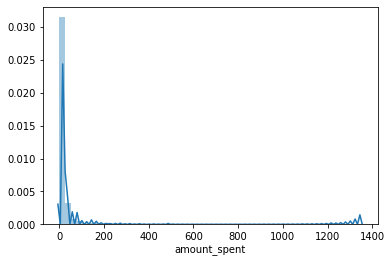

In [47]:
#better looking 
sns.distplot(spain['amount_spent'])

#### Select all orders made in the month of August.

In [48]:
august = orders[orders['month'] == 8]

#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [49]:
august['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country?

In [50]:
avg_country = orders.groupby('Country')[['Country', 'amount_spent']].mean().sort_values(by=['amount_spent'])
avg_country

,amount_spent
Country,
Unspecified,10.930615
Saudi Arabia,16.213333
RSA,17.281207
USA,20.002179
Belgium,20.283772
United Kingdom,20.625073
European Community,21.670833
Cyprus,22.134169
Poland,22.226212


#### What's the most expensive item?

In [51]:
orders[orders['UnitPrice'] == orders['UnitPrice'].max()]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What is the average amount spent per year?

In [52]:
avg_year = orders.groupby('year')[['year', 'amount_spent']].mean().sort_values(by=['amount_spent'])
avg_year

,year,amount_spent
year,,
2010,2010,21.892733
2011,2011,22.430074
